In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
tracked = np.load('tracked-log01.npy')
ours = np.load('log01.npy').reshape(-1, 8)

In [49]:
ours_ts = ours[:, 0]
tracked_ts = tracked[:, 0]
ours_pos = ours[:, 1:3]
tracked_pos = tracked[:, 1:3] * 1000
ours_vel = ours[:, 3:5]
tracked_vel = tracked[:, 1:3] * 1000
vision_pos = ours[:, 5:7]
vision_heading = ours[:, 7]

In [34]:
t_matchings = np.zeros(len(ours_ts), dtype=int)
for i, ts in enumerate(ours_ts):
    idx = np.argmin(np.abs(tracked_ts - ts))
    t_matchings[i] = idx

t_ts = tracked_ts[t_matchings]
t_pos = tracked_pos[t_matchings]
t_vel = tracked_vel[t_matchings]

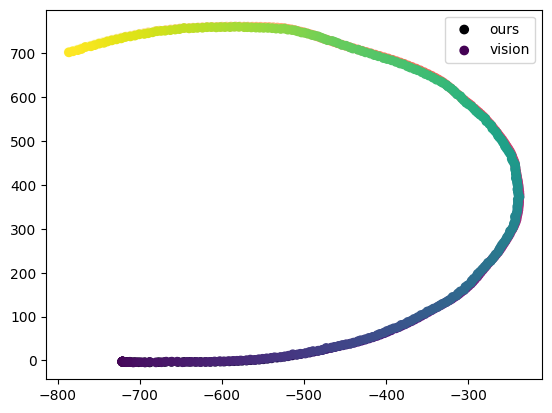

In [35]:
# plt.scatter(tracked_pos[:, 0], tracked_pos[:, 1], label='tracked')
plt.scatter(ours_pos[:, 0], ours_pos[:, 1],  c=ours_ts, cmap='magma', label='ours')
plt.scatter(vision_pos[:, 0], vision_pos[:, 1], c=ours_ts, cmap='viridis', label='vision')
plt.legend()
plt.show()

0.22151278734349014

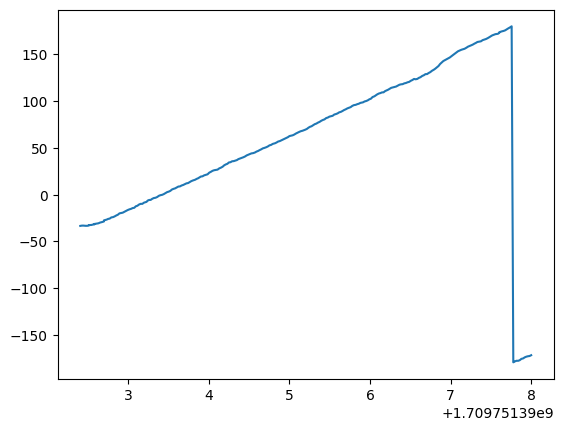

In [56]:
plt.plot(ours_ts, np.degrees(vision_heading))
np.radians((np.max(np.degrees(vision_heading)) - np.degrees(vision_heading)[0]) / (ours_ts[np.argmax(vision_heading)] - ours_ts[0])) / np.pi

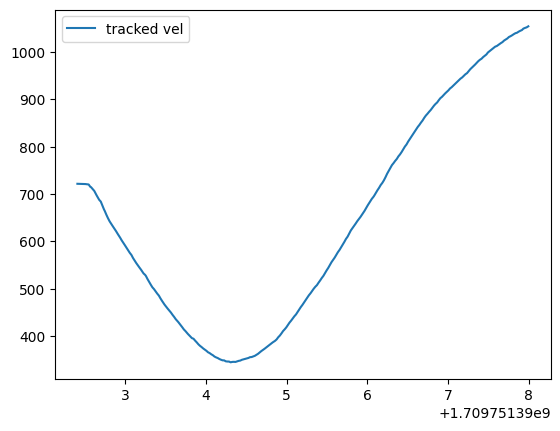

In [48]:
plt.plot(t_ts, np.linalg.norm(t_vel, axis=1), label='tracked vel')
# plt.plot(ours_ts, np.linalg.norm(ours_vel, axis=1), label='our vel')
# plt.plot(ours_ts, np.linalg.norm(np.diff(vision_pos) / (np.diff(ours_ts) + 1e-16), axis=1), label='vision vel')
plt.legend()